The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


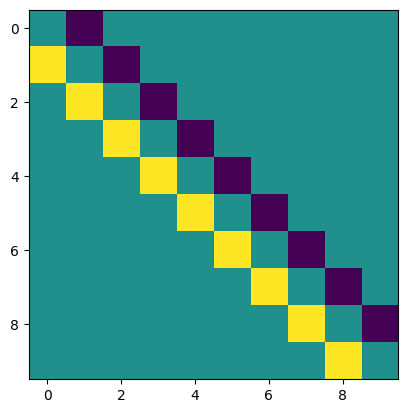

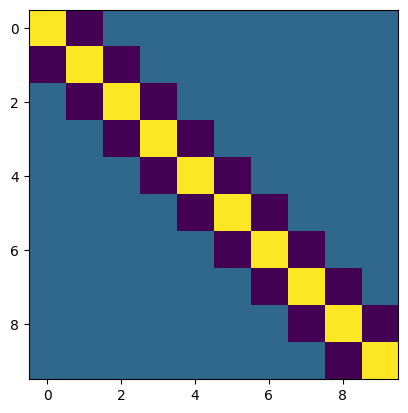

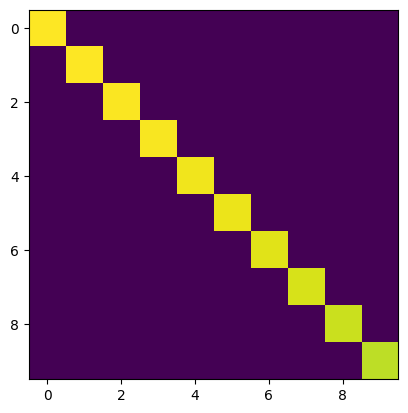

In [105]:
%load_ext autoreload
%autoreload all
from HammiltonSolver_funcs import *
from matplotlib import pyplot as plt

potFunc = potFunc_transmon

phimax = np.pi
dphi = 0.05
vecLen = int(2*phimax/dphi)

hbar = 1

#diff opp
#-1 1
#0 0

n = -get_diffop_sparse(phimax, dphi)*hbar*1j
nn = -get_ddop_sparse(phimax, dphi)*hbar**2

#matrixdisplay
plt.imshow(n.toarray().imag[:10, :10])
plt.show()

#display second derivative
plt.imshow(nn.toarray().real[:10, :10])
plt.show()

#potopp
pot = get_potop_sparse(phimax, dphi, potFunc)

#matrixdisplay
plt.imshow(pot.toarray().real[:10, :10])
plt.show()


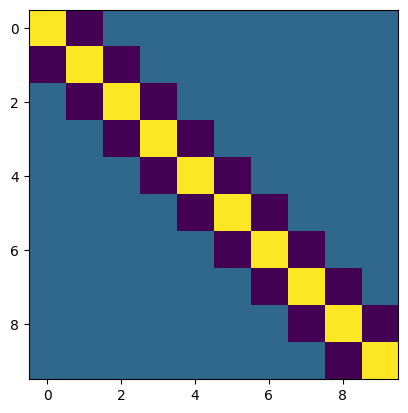

In [106]:
#find eigenvalues
Ej = 10
Ec = 1
hamiltonian = 4*Ec*nn + Ej*pot

plt.imshow(hamiltonian.toarray().real[:10, :10])
plt.show()

eigenvalues, eigenvectors, basisTransform = solveEi(hamiltonian.toarray())
basisTransform = sparse.csr_matrix(basisTransform)




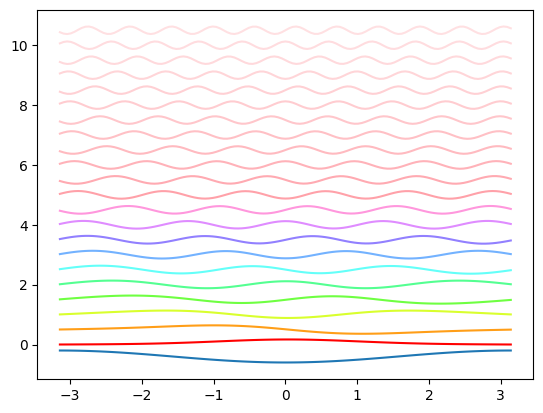

'cnt = 0\nfor i in range(len(negEigenvalues)):\n    plt.plot(X, negEigenvectors[:,i].real, color=cmap((i*1e-1)%1),alpha=np.exp(-cnt*1e-2-0.2),zorder=1000-cnt)\n    cnt += 1\n    if cnt > 1000: break\nplt.ylim(-0.2,0.2)\nplt.show()'

In [107]:
#plot eigenvecs
import numpy as np
PHI = np.linspace(-phimax, phimax, vecLen)
plt.plot(PHI, potFunc(PHI)*2e-1-0.4, zorder=101)
#plt.plot(X, eigenvectors[:,0].real, color='red')
#make cmap for differentiating the plots
cmap = plt.get_cmap('hsv')
for i in range(len(eigenvalues)):
    plt.plot(PHI, eigenvectors[:,i].real+i/2, color=cmap(i*1e-1),alpha=np.exp(-i*1e-1),zorder=100-i)
    if i > 20: break
plt.show()
#plot neg eigenvecs
#plt.plot(X, potFunc(X)*1e-3, zorder=1001)
#plt.plot(X, negEigenvectors[:,0].real, color='red')
"""cnt = 0
for i in range(len(negEigenvalues)):
    plt.plot(X, negEigenvectors[:,i].real, color=cmap((i*1e-1)%1),alpha=np.exp(-cnt*1e-2-0.2),zorder=1000-cnt)
    cnt += 1
    if cnt > 1000: break
plt.ylim(-0.2,0.2)
plt.show()"""

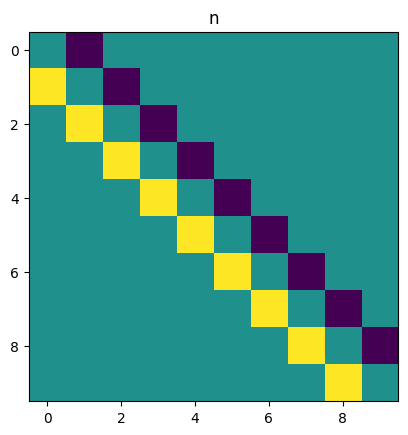

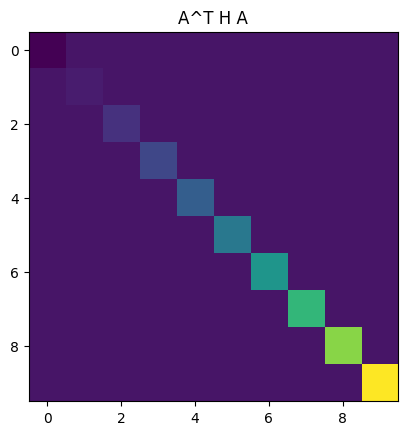

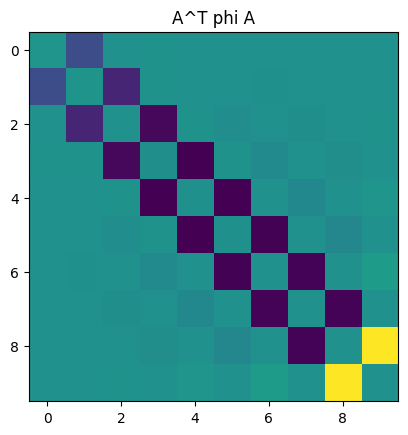

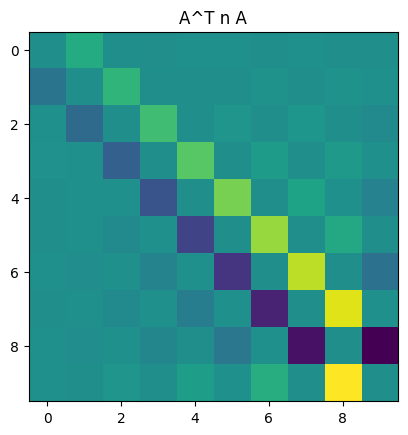

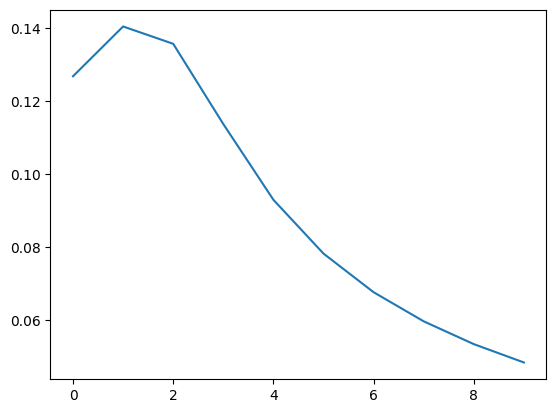

In [108]:
#hDiag = np.dot(np.dot(basisTransform.T, hamiltonian), basisTransform)
hDiag = basisTransform.T @ hamiltonian @ basisTransform
phi = diags_array(np.linspace(-phimax, phimax, vecLen))
#phiDiag = np.dot(np.dot(basisTransform.T, phi), basisTransform)
phiDiag = basisTransform.T @ phi @ basisTransform
n = n
#nDiag = np.dot(np.dot(basisTransform.T, n), basisTransform)
nDiag = basisTransform.T @ n @ basisTransform

plt.imshow(n.toarray().imag[:10, :10])
plt.title('n')
plt.show()

plt.imshow(hDiag.toarray().real[:10, :10])
plt.title('A^T H A')
plt.show()

plt.imshow(phiDiag.toarray().real[:10, :10])
plt.title('A^T phi A')
plt.show()

plt.imshow(nDiag.toarray().imag[:10, :10])
plt.title('A^T n A')
plt.show()

#compute delta energies and plot them
energies = [hDiag[i,i] for i in range(len(eigenvalues))]
deltaE = np.diff(energies)
plt.plot((deltaE**-1)[:10])
plt.show()



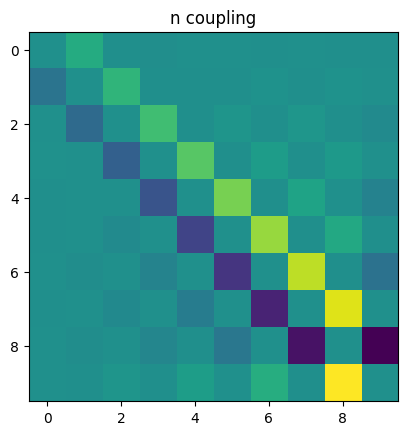

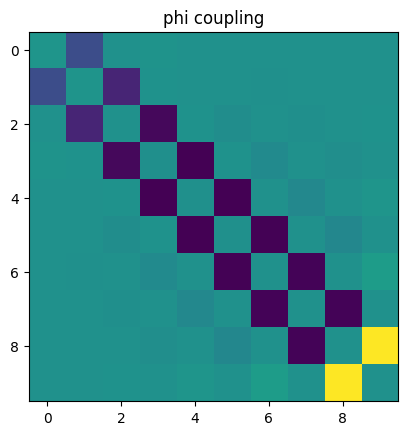

In [109]:
#calculating transfer coefficients

#1 limit the scope to a basis of 10
#2 given a parameter q (pseudo charge), compute the coupling coefficients by inner producting over both x and p opperators
#3 given some field strength of the pertubation, add this
#4 display the coupling matricies

#1
basis = 10
eigenvalues = sparse.csr_matrix(eigenvalues[:basis].astype(np.complex128))
eigenvectors = sparse.csr_matrix(eigenvectors[:,:basis].astype(np.complex128))
basisTransform = sparse.csr_matrix(basisTransform[:,:basis].astype(np.complex128))

#1.5 export the diagonalized hamiltonian
np.save('HDiag_transmon.npy', hDiag.toarray()[:basis, :basis])

#2
q = 1
coupling_n = sparse.csr_matrix(np.zeros((basis, basis), dtype=np.complex128))
for i in range(basis):
    for j in range(basis):
        coupling_n[i,j] = np.dot(np.conjugate(eigenvectors.toarray()[:,i].T),np.dot(n.toarray(), eigenvectors.toarray()[:,j]))*q
        

coupling_phi = sparse.csr_matrix(np.zeros((basis, basis), dtype=np.complex128))
for i in range(basis):
    for j in range(basis):
        coupling_phi[i,j] = np.dot(np.conjugate(eigenvectors.toarray()[:,i].T),np.dot(phi.toarray(), eigenvectors.toarray()[:,j]))*q
        

#3
field = 1
coupling_phi *= field
coupling_n *= field

#4
plt.imshow(coupling_n.toarray().imag)
plt.title('n coupling')
plt.show()
#save coupling_p
np.save('coupling_n_transmon.npy', coupling_n.toarray())

plt.imshow(coupling_phi.toarray().real)
plt.title('phi coupling')
plt.show()
#save coupling_x
np.save('coupling_phi_transmon.npy', coupling_phi.toarray())
